# DATA SCIENCE Y MACHINE LEARNING APLICADA A LA PREVENCIÓN DE LA  FUGA DE TALENTO

## INTRODUCCIÓN Y OBJETIVOS

La fuga de talento es una de las principales amenazas de cualquier organización.
El objetivo del presente estuido es identificar los principales factores que condicionan la fuga de taleno, y la creación de un modelo predictivo que permita prevenir este suceso y establecer acciones encaminadas a su prevención.

Mediante la puesta en práctica de esta propuesta formativa de Data Science For Business, pretendo ampliar y aplicar mis conocimientos en Ciencia de Datos a un caso real, y dar mis primeros pasos en la programación de Machine Learning, concretamente con la librería SKLEARN , y un algoritmo tipo Arbol.

# 0. PASOS PREVIOS

### 0.1 CARGA DE LIBRERIAS

Aquí añado algunas de las librerías que suelo utilizar a mayores de las propuestas en el curso.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from datetime import date
import seaborn as sn
import json
from IPython.display import Image
import cufflinks as cf
from IPython.display import display,HTML
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree
%matplotlib inline

###  0.2 FUNCIONES

En esta parte del libro cargo las principales funciones a utilizar durante el libro. Algunas de ellas son precisamente elaboradas a partir de material del Bootcamp de Data Science de Hack a Boss y el Canal Data Science for Business.

In [2]:
def detectar_nulos(frame, ratioX):
    for col in frame:
        try:
            empty = frame[col].isna().value_counts()[1]
        except KeyError as e:
            empty = 0
        ratio = empty / frame.shape[0]
        if ratio > ratioX:
            print("{}: {:0.2f}".format(col, ratio))

In [3]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12) 

In [4]:
def encoder(DF, columna): #### Esta función no se llega a utilizar dado qye sklearn tiene funciones análogas
    encoder_list = []
    y = DF[str(columna)].unique()
    for i in y:
        encoder_list.append(i)
    encoder = OrdinalEncoder(categories=[encoder_list])
    encoder.fit(df[[columna]])
    DF[columna] = encoder.transform(DF[[columna]])
    DF[columna] = DF[columna]
    
    return DF

In [5]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

## 1. CARGA DE LOS DATOS

Se cargan los datos desde el CSV facilitado para el curso.
Cabe reseñar, que para generar las columnas, se emplea el argumento "sep", y que el argumento index_col identifica el index. Por otro lado, el na_values, sirve para traducir los valores nulos de un documento excel o csv a los na values de Data Frames en pandas.


In [6]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

## 2. CALIDAD DE DATOS 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

#### 2.1 ANÁLISIS DE NULOS

In [8]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

In [9]:
df.duplicated().sum()

0

Vemos el que columnas tienen un % de nulos superior al 25% y las eliminamos.

In [10]:
detectar_nulos(df,0.25)

conciliacion: 0.69
anos_en_puesto: 0.84


A continuación elimanamos estas columnas.

In [11]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)

# 3 ANÁLISIS EXPLORATORIO

#### EDA VARIABLES CATEGÓRICAS

Comenazamos analizando los gráficos de variables categóricas siguiendo lo expuesto en el curso.

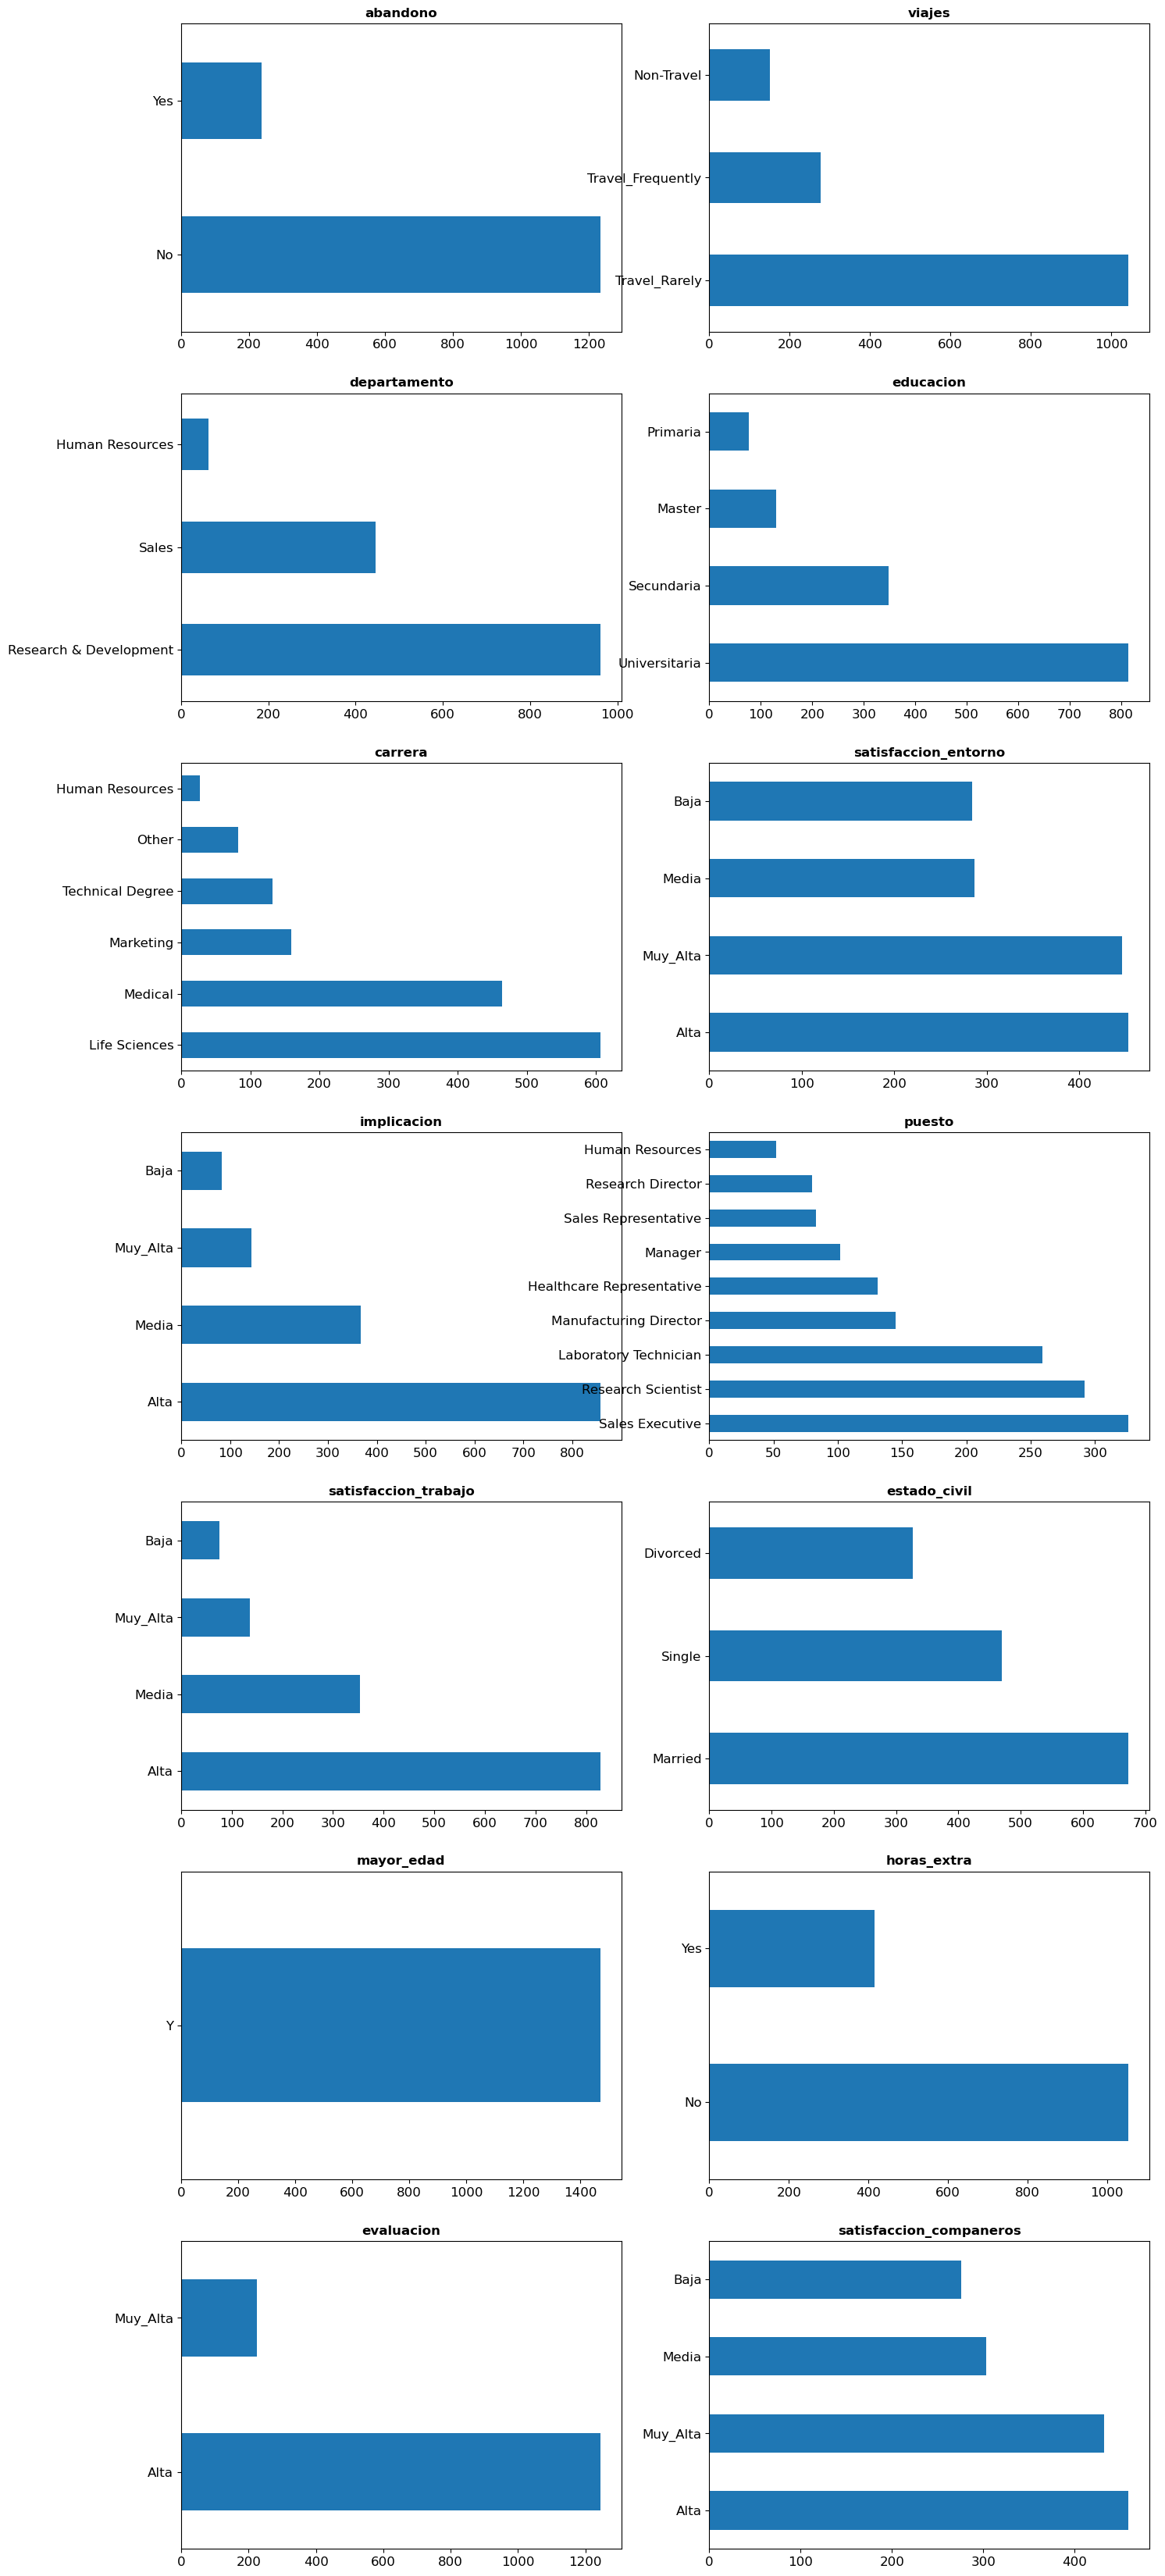

In [12]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:

Eliminamos la variable mayor de edad porque no aporta información.
* Sobre las imputaciones pendientes de variables categóricas:
  * educacion: imputar por 'Universitaria'
  * satisfaccion_trabajo: imputar por 'Alta'
  * implicacion: imputar por 'Alta'

In [13]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

A continuación se procede a transformar las variables categóricas en numéricas para su posterior tratamiento.

Comenzamos por viajes:

In [14]:
def encoder(DF, columna):
    encoder_list = []
    y = DF[str(columna)].unique()
    for i in y:
        encoder_list.append(i)
    encoder = OrdinalEncoder(categories=[encoder_list])
    encoder.fit(df[[columna]])
    DF[columna] = encoder.transform(DF[[columna]])
    DF[columna] = DF[columna]
    
    return DF

Tras probar esta función, se concluye que es de menor utilidad que los de la librería SKLearn.

#### EDA VARIABLES NUMÉRICAS

Empleamos la función propuesta en el curso para visualizar los principales estadísticos.

In [15]:
estadisticos = estadisticos_cont(df.select_dtypes('number'))
estadisticos

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Se eliminan las variables con pocos valores con nulos para su eliminación.


In [16]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)

### 4 .GENERACIÓN DE INSIGHTS DE EL ANÁLISIS DE DATOS

### Análisis de Correlación

Antes de explorar los principales insights veremos los parámetros de mayor impacto en el abandono:

Se ve que hasta aplicar las funciones de SKLearn, no aporta valor un análisis sin la transformación de las variables no numéricas.

In [17]:
encoded = encoder(df, "abandono")

In [18]:
encoded

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,0.0,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,1.0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,0.0,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,1.0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,1.0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,1.0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,1.0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,1.0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


<function matplotlib.pyplot.show(close=None, block=None)>

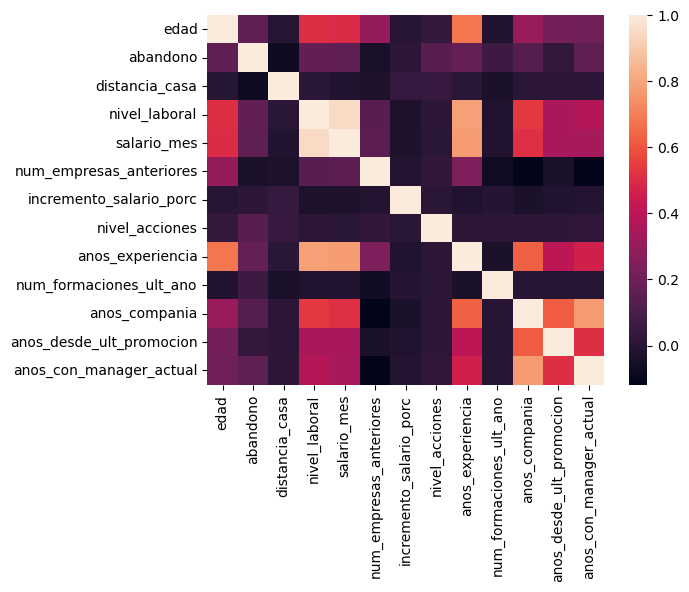

In [19]:
sns.heatmap(encoded.corr())
plt.show

### ¿Que factores afectan en mayor medida?

Tras una primera visualización, se extrae que los factores que mayor contribución contribuyen a la rotacion de personal:
 
 1. Horas extra.
 2. Años de experiencia.
 3. Nivel laboral.
 4. Estado civil.
 5. Salario.
 
Los factores de mayor contribución a la retención de talento serían:

 1. Ambiente de trabajo.
 2. Distancia a casa.
 3. Carrera.
 4. Implicación.
 5. Satisfacción Laboral.

En apartados posteriores veremos la coherencia de estas conclusiones con la información del DF1 sin transformar las variables categóricas.

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [20]:
df.groupby("abandono").abandono.count()

abandono
0.0     237
1.0    1233
Name: abandono, dtype: int64

In [21]:
237/1233*100

19.22141119221411

---
<br/><br/>

### ¿Hay un perfil tipo de empleado que deja la empresa?

In [22]:
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'satisfaccion_entorno', 'implicacion',
       'nivel_laboral', 'puesto', 'satisfaccion_trabajo', 'estado_civil',
       'salario_mes', 'num_empresas_anteriores', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'nivel_acciones', 'anos_experiencia', 'num_formaciones_ult_ano',
       'anos_compania', 'anos_desde_ult_promocion', 'anos_con_manager_actual'],
      dtype='object')

In [23]:
px.histogram(data_frame = df,
             x = "edad",
             hover_data = ["abandono"],
             color      = "abandono",
             nbins      = 80)

In [24]:
px.histogram(data_frame = df,
             x = "educacion",
             hover_data = ["educacion"],
             color      = "abandono",
            nbins = 4)

In [25]:
px.histogram(data_frame = df,
             y = "estado_civil",
             hover_data = ["abandono"],
             color      = "abandono",
            nbins = 3
            )

In [26]:
px.histogram(data_frame = df,
             y = "horas_extra",
             hover_data = ["abandono"],
             color      = "abandono",
            nbins = 10
            )

In [27]:
px.histogram(data_frame = df,
             y = "salario_mes",
             hover_data = ["abandono"],
             color      = "abandono",
            nbins = 10
            )

In [28]:
px.histogram(data_frame = df,
             y = "departamento",
             hover_data = ["abandono"],
             color      = "abandono",
            nbins = 10
            )

In [29]:
px.histogram(data_frame = df,
             y = "nivel_laboral",
             hover_data = ["abandono"],
             color      = "abandono",
            nbins = 10
            )

In [30]:
px.histogram(data_frame = df,
             y = "satisfaccion_entorno",
             hover_data = ["abandono"],
             color      = "abandono",
            nbins = 10
            )

In [31]:
px.histogram(data_frame = df,
             y = "satisfaccion_trabajo",
             hover_data = ["abandono"],
             color      = "abandono",
            nbins = 10
            )

In [32]:
px.histogram(data_frame = df,
             y = "satisfaccion_trabajo",
             hover_data = ["abandono"],
             color      = "abandono",
            nbins = 10
            )

In [33]:
df.sample(1)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1804,35,1.0,Non-Travel,Research & Development,2,Universitaria,Medical,Media,Alta,2,...,No,14,Alta,Alta,1,15,6,7,1,7


Los principales motivos de la fuga de talento tras este primer análisis son: 

Salario, horas extra, departamento(ventas), horas extra, clima laboral.

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

---
<br/><br/>

### ¿Cual es el impacto económico de este problema?

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [34]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [35]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
                
#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,0.0,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,1.0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,0.0,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,1.0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,1.0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,1.0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,1.0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,1.0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


---
<br/><br/>

### ¿Cúanto nos ha costado este problema en el último año?

In [36]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

20778857.484

---
<br/><br/>

### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [37]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

939495.5760000001

---
<br/><br/>

### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [38]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 2077885$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 4155771$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 6233657$ cada año.


---
<br/><br/>

### Y podemos seguir trazando estrategias asociadas a los insights de abandono:

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [39]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.6024096385542169

Ahora vamos a estimar cuántos se nos irán este año

In [40]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [41]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 30594.803855421687$.


Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

# 5. Modelo de Machine Learning

En anteriores apartados abarcamos un análisis estático de la infomración. En este apartado exploraremos las principales funciones de Machine Learning para establecer escenarios predicitivos que permitan anticipar la fuga de talento y establecer acciones encaminadas a su prevención.

Copiamos la base de datos original para evitar alterarla.


In [42]:
df_ml = df.copy()

## 5.1 TRANSFORMACIÓN DE VARIABLES CATEGÓTICAS A NUMÉRICAS

In [43]:
cat = df_ml.select_dtypes('O')
ohe = OneHotEncoder(sparse = False)
ohe.fit(cat)
cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

Ahora seleccionamos las variables numéricas en otro DF para en última instancia juntar ambos DF

In [44]:
num = df.select_dtypes('number').reset_index(drop = True)

In [45]:
df_ml = pd.concat([cat_ohe,num], axis = 1)


## 5.2 MODELIZACIÓN

### 5.2.1 SEPARACIÓN PREDICTORAS Y TARGET

In [46]:
predictoras = df_ml.drop(columns='abandono')

In [47]:
target = df_ml['abandono']

### 5.2.2 SEPARACIÓN TRAIN Y TEST

Ponemos 0.3 para indicar que es un 70 / 30 en train / test.

In [48]:
train_x, test_x, train_y, test_y = train_test_split(predictoras, target, test_size = 0.4) 

### 5.2.3 ENTRENAMIENTO DEL MODELO

Max depth es el número de niveles del árbol, que poderemos modificar para ajustar la precisión del modelo.

In [49]:
ac = DecisionTreeClassifier(max_depth=3)

In [50]:
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=3)

### 5.2.4 PREDICCIÓN Y VALIDACIÓN SOBRE TEST

Lo hacemos sobre los primeros 20 empleados

In [51]:
pred = ac.predict_proba(test_x)[:, 1]
pred[:30]

array([0.91161179, 0.91161179, 0.8373494 , 0.91161179, 0.91161179,
       0.8373494 , 0.91161179, 0.46875   , 0.91161179, 0.46875   ,
       0.91161179, 0.46875   , 0.91161179, 0.        , 0.8373494 ,
       0.91161179, 0.91161179, 0.8373494 , 0.91161179, 0.91161179,
       0.91161179, 0.91161179, 0.91161179, 0.91161179, 0.91161179,
       0.91161179, 0.91161179, 0.91161179, 0.91161179, 0.91161179])

Se hace en base a los siguientes parámetros:

    < 0,7 modelo malo
    
    entre  0,7 y 0,8  modelo aceptable
    
    > 0,8 modelo bueno

In [52]:
roc_auc_score(test_y,pred)

0.7266510486390005

## 5.3 INTERPRETACIÓN

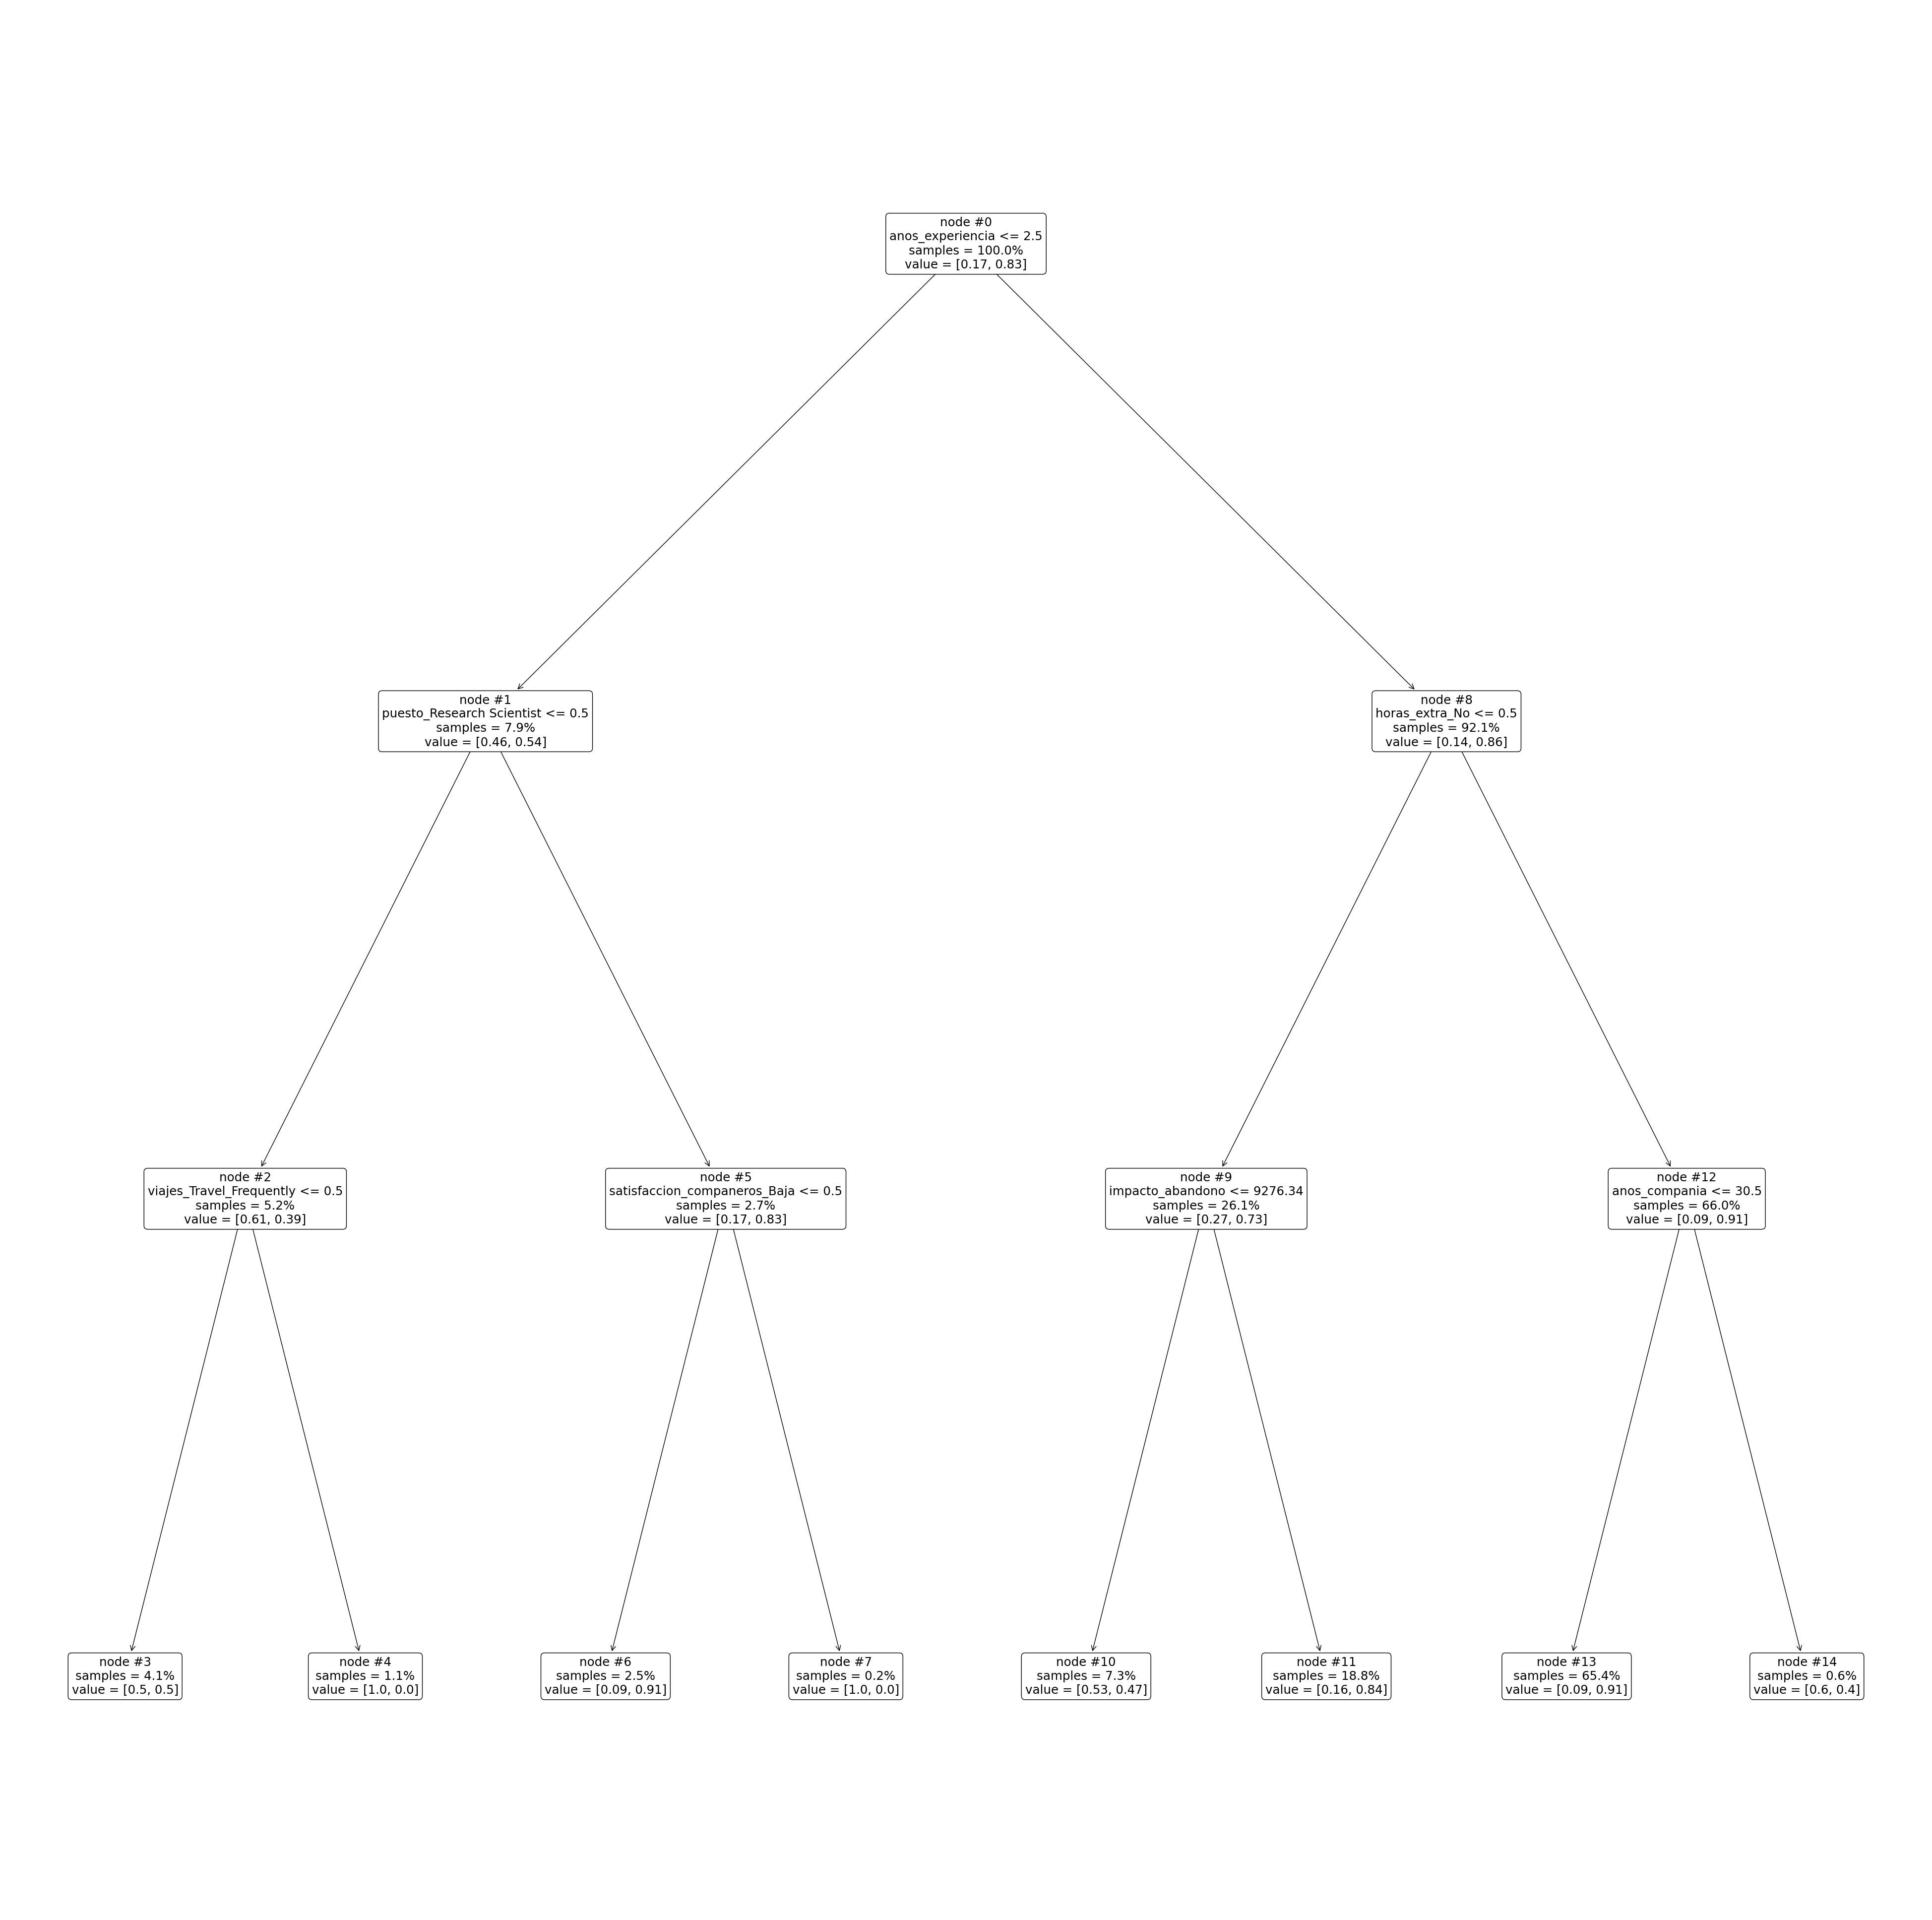

In [53]:
plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

### RELEVANCIA DE CADA VARIABLE

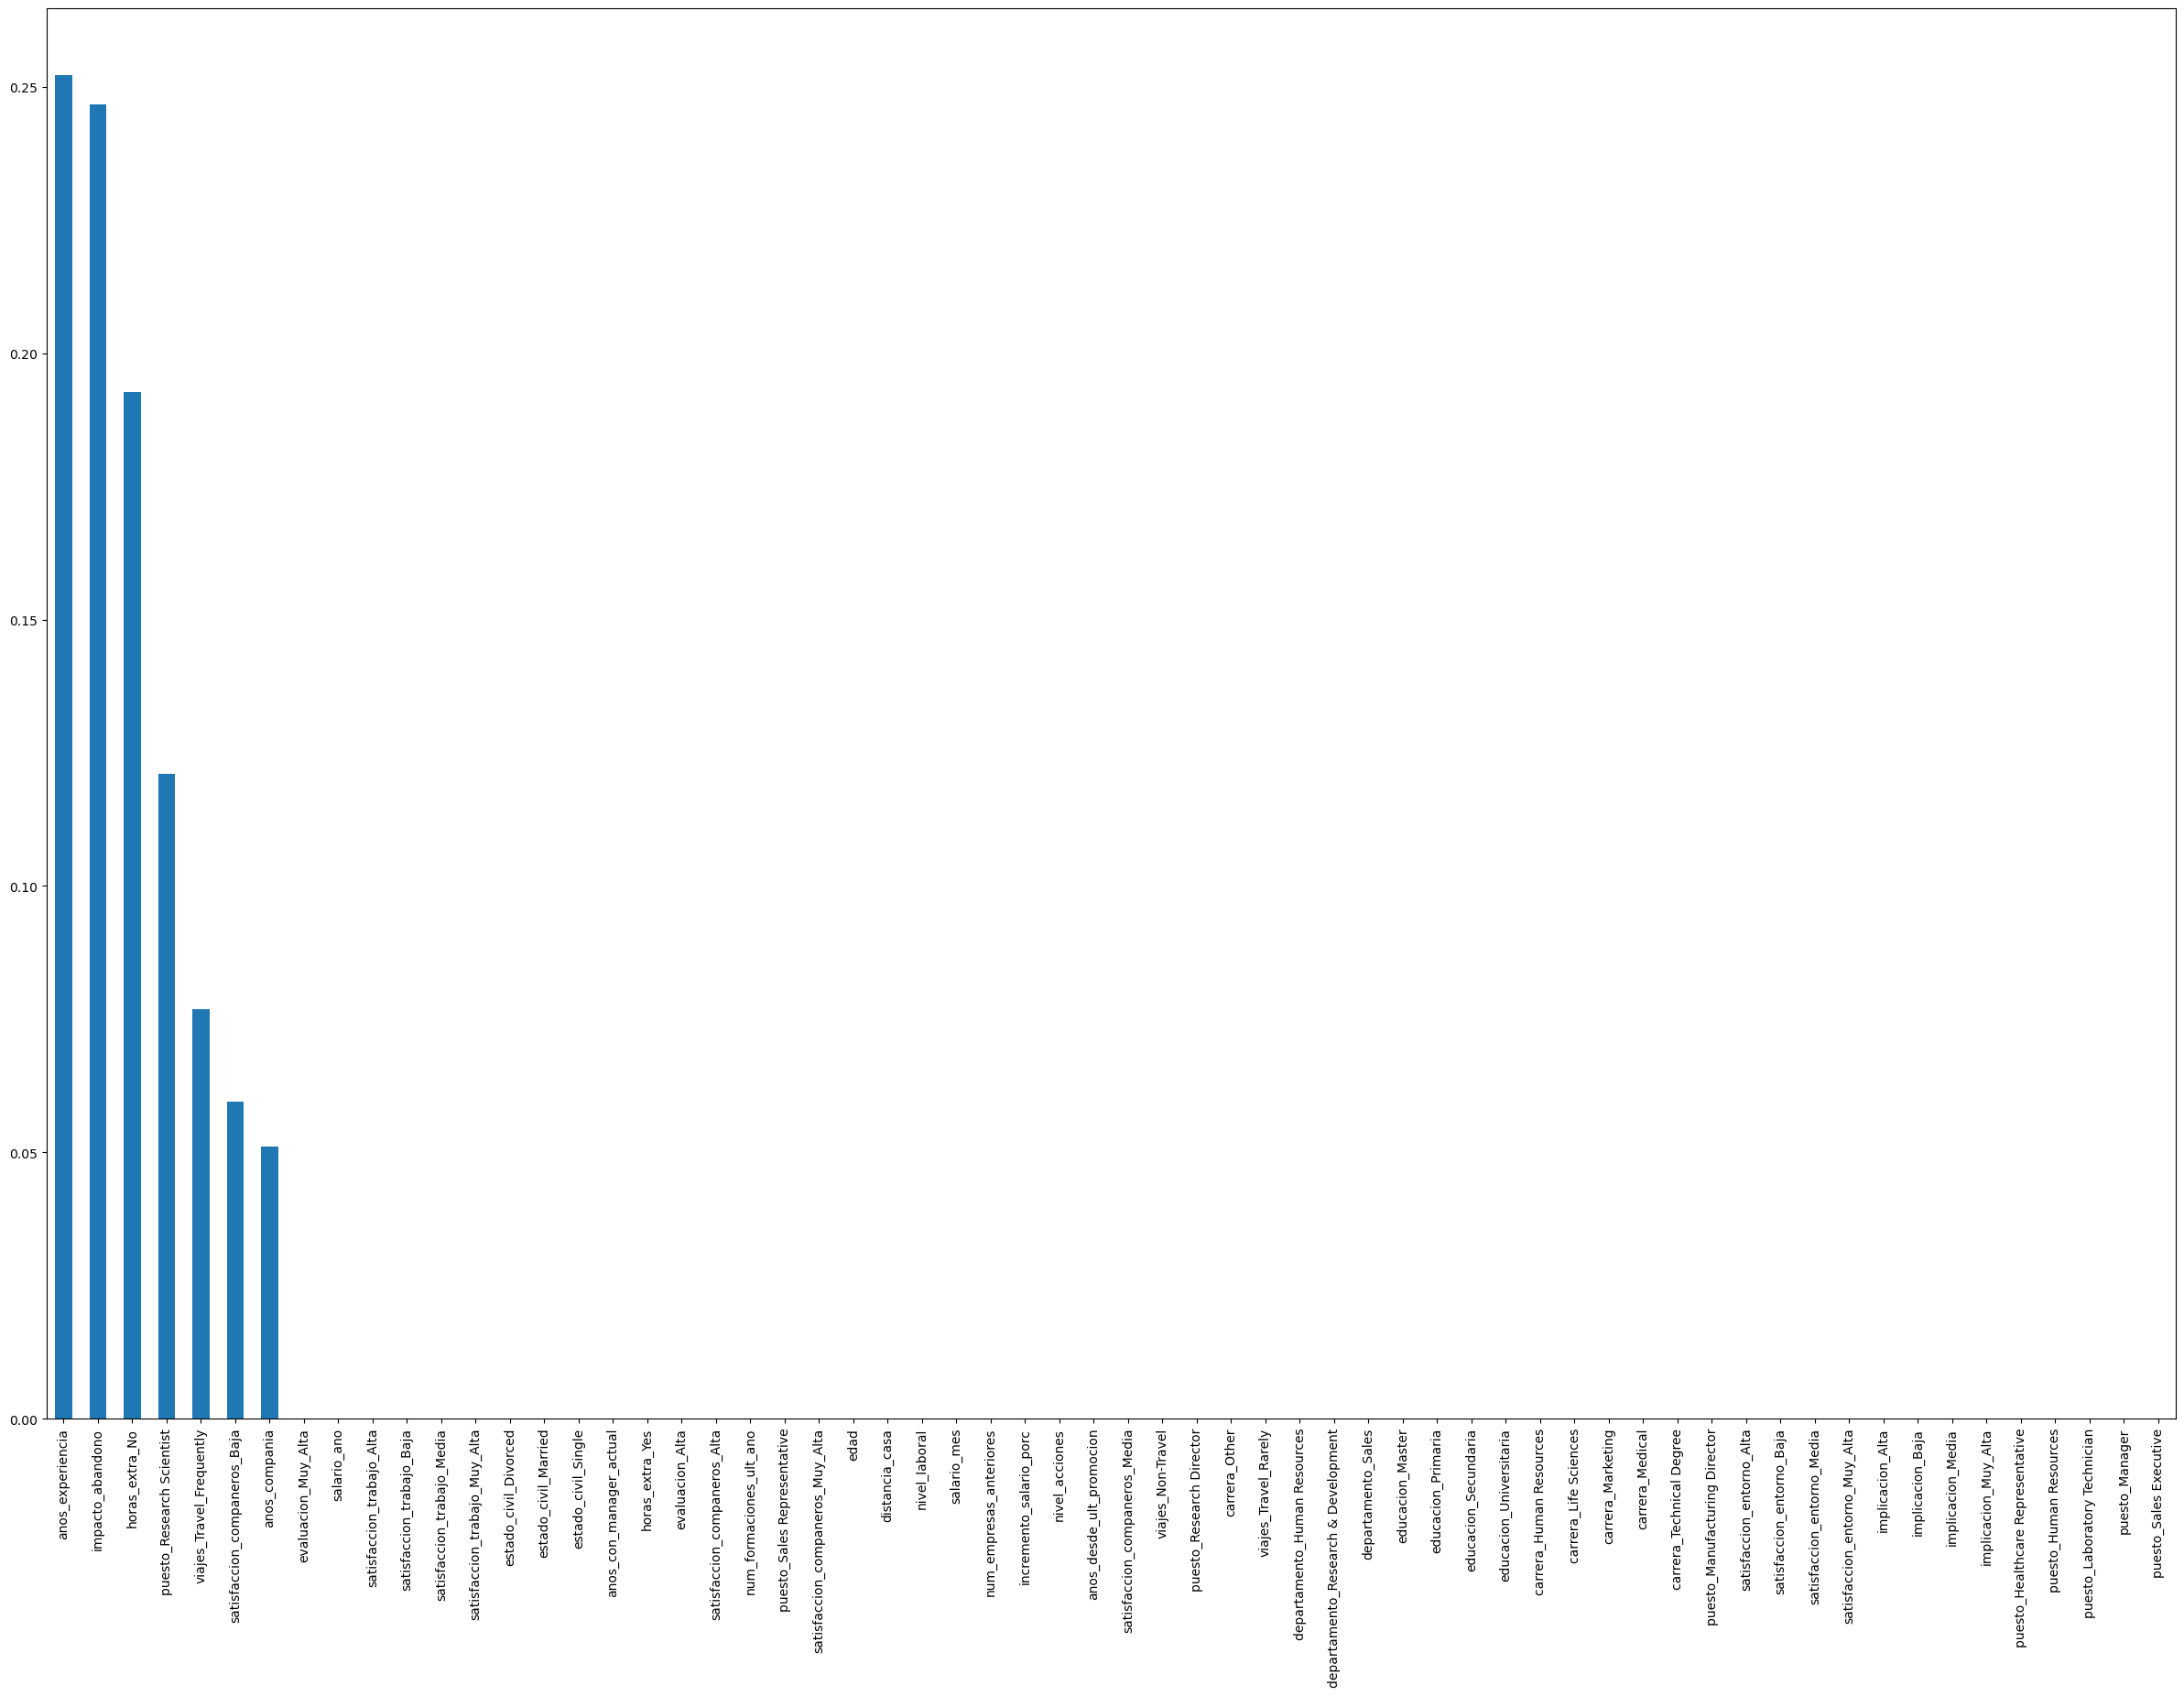

In [54]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

## 5.4 EXPLOTACIÓN

Ahora pasamos a analizar la información predictiva de los trabajadores con mayor probabilidad de abandonar la empresa.

In [55]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,0.0,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.837349
2,49,1.0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.911612
4,37,0.0,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.468750
5,33,1.0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.468750
7,27,1.0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.911612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,1.0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.911612
2062,39,1.0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.911612
2064,27,1.0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.837349


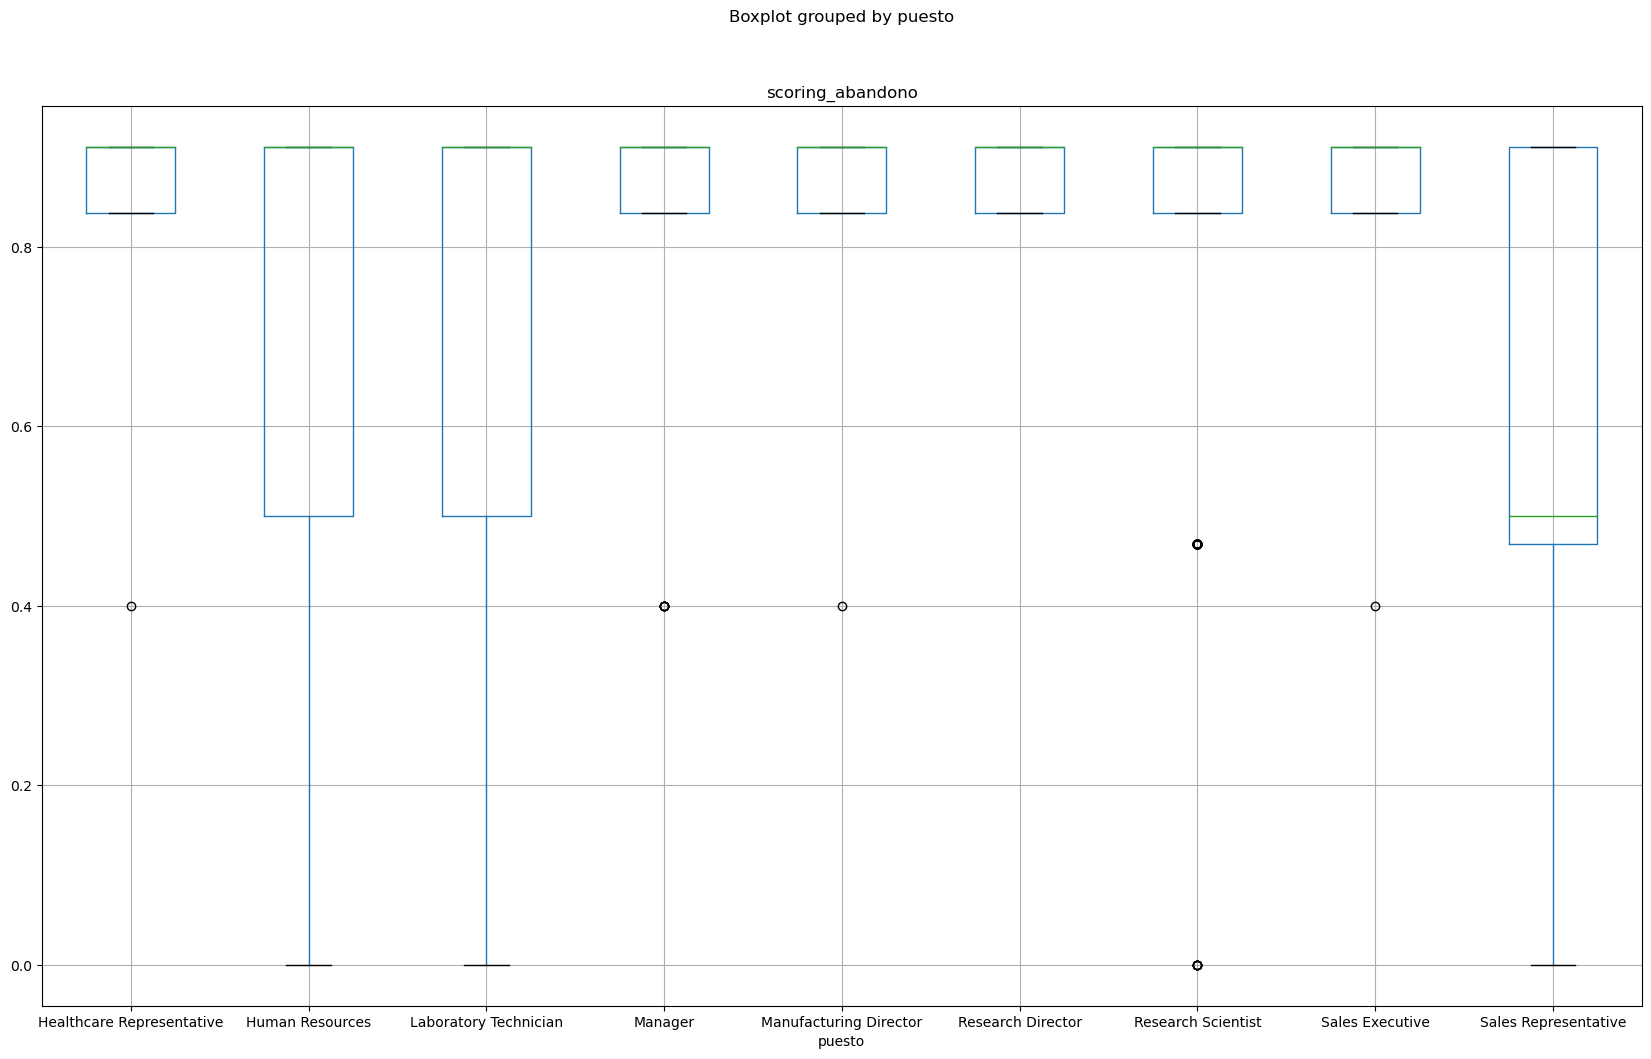

In [56]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));


# 5.5 VISUALIZACIÓN Y ANÁLISIS

Pasamos al información a Power BI una vez exportado a excel.

In [60]:
df.to_excel("talento_excel.xlsx")

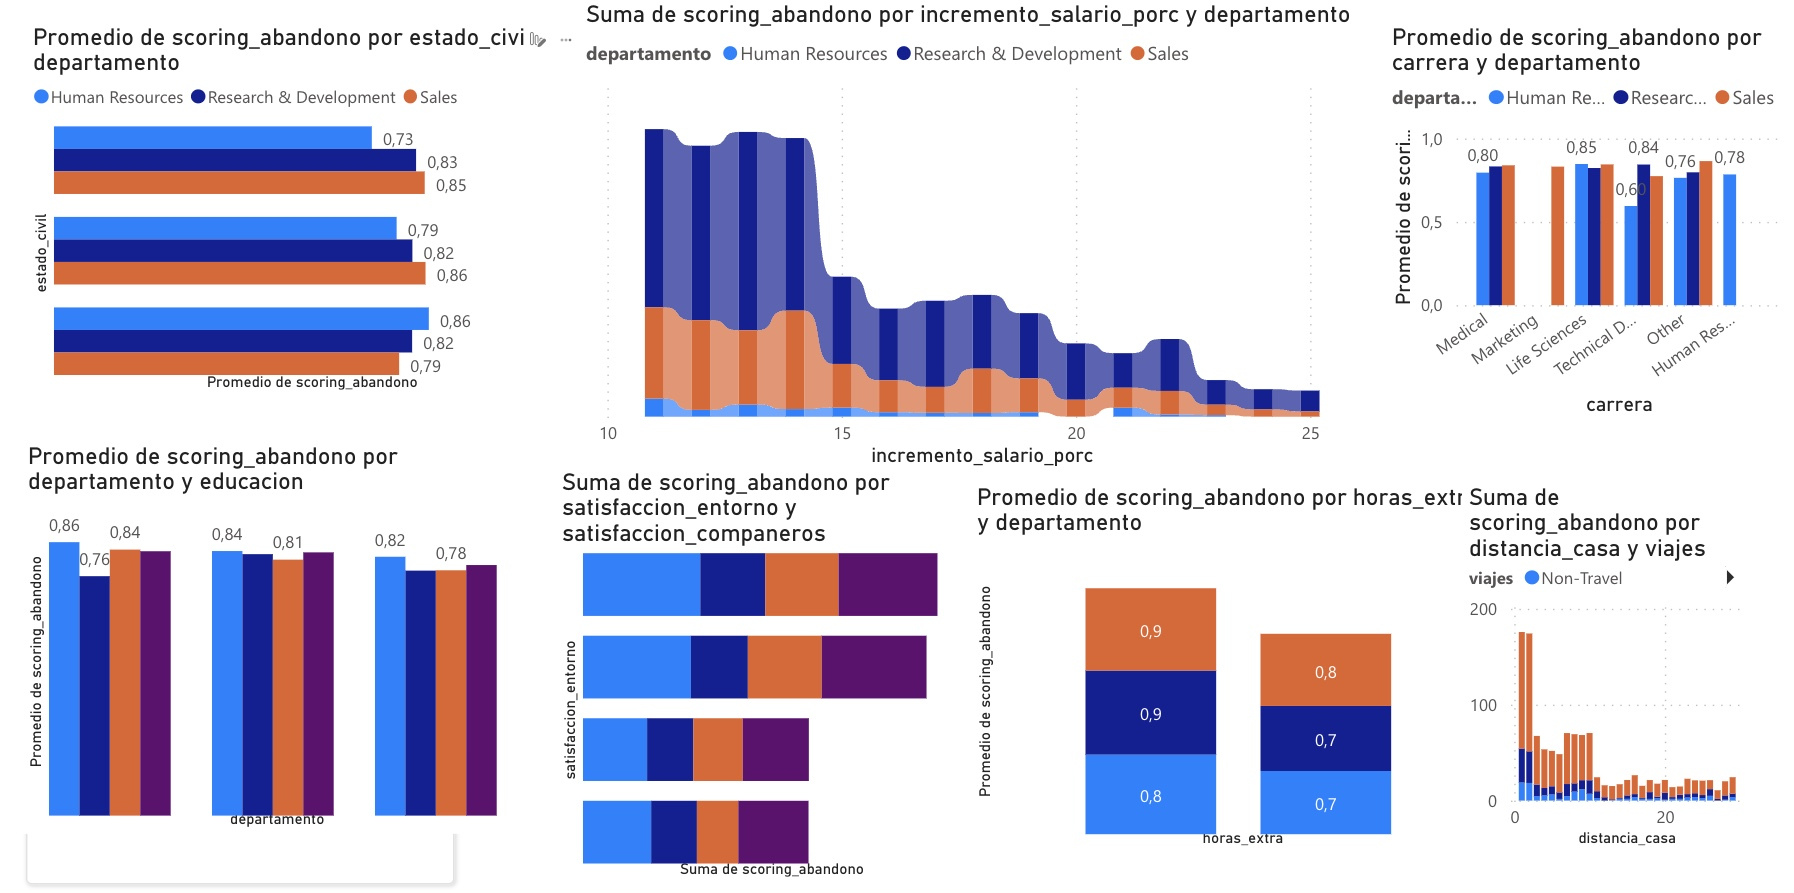